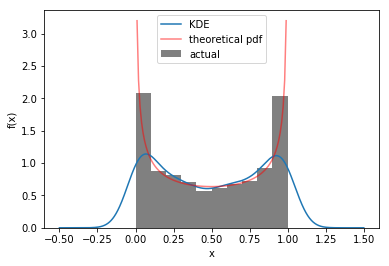

In [5]:
from scipy.stats import arcsine
from math import sqrt
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from scipy import stats
   
##Выберем наше распределение
arcsine_rv = arcsine()
##Создадим выборку размером 1000
sample_arcsine = arcsine_rv.rvs(1000)

##Получим теоретическую плотность распределения на промежутке 0.00-1.00
x = np.linspace(0.01,0.99, 100)
pdf = arcsine_rv.pdf(x)

#Нарисуем сглашенную функцию плотности распределения
df = pd.DataFrame(sample_arcsine, columns=['KDE'])
df.plot(sample_arcsine, kind = 'density')

#Нарисуем теоретическую плотность распределения
plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)

#нарисуем гистограмму выборки
plt.hist(sample_arcsine,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

mean, var, skew, kurt = arcsine.stats(moments='mvsk')
MU = float(mean)
SIGMA = sqrt(var)

In [8]:
##Определим функцию для подсчета выборочных средних
def clt(sample,sub_sample_size):
    means = []
    for i in range(1000):
        sub_sample = sample[np.random.randint(0,len(sample),sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = SIGMA/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU,SE)
    
    print ('Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU,mu))
    print ('Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE,sigma))
    print ('Приближенное среднее 95% доверительный интервал = {:.2f} +/- {:.2f}'.format(mu,2*SE))
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.16 vs 0.16
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.32


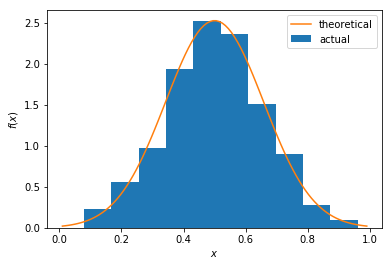

In [10]:
#Распределение выборочного среднего для n=5
clt(sample_arcsine,5)

Теоретическое среднее vs приближенное: 0.50 vs 0.49
Теоретическое стандартное откл. vs приближенное: 0.11 vs 0.11
Приближенное среднее 95% доверительный интервал = 0.49 +/- 0.22


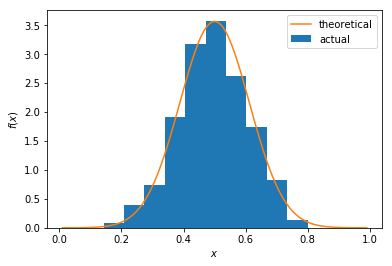

In [11]:
#Распределение выборочного среднего для n=10
clt(sample_arcsine,10)

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.05 vs 0.05
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.10


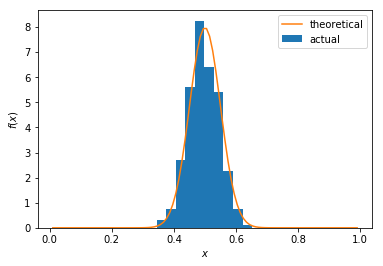

In [12]:
#Распределение выборочного среднего для n=50
clt(sample_arcsine,50)

Теоретическое среднее vs приближенное: 0.50 vs 0.50
Теоретическое стандартное откл. vs приближенное: 0.02 vs 0.02
Приближенное среднее 95% доверительный интервал = 0.50 +/- 0.03


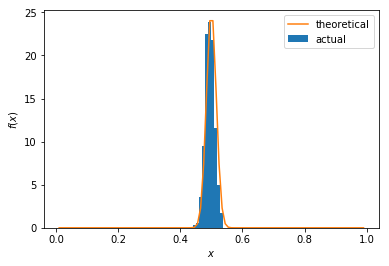

In [13]:
#Распределение выборочного среднего для n=500
clt(sample_arcsine,500)

In [ ]:
Вывод.
Мы видим, что при увеличении n стандартная ошибка среднего уменьшается.